In [3]:
import gym
import numpy
import numpy as np

from Agents import Agent
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
env = gym.make('CartPole-v0')
N = 20
batch_size = 5
n_epochs = 2
alpha = 0.001
agent = Agent(n_actions=env.action_space.n, batch_size=batch_size,
              alpha=alpha, n_epochs=n_epochs,
              input_dims=env.observation_space.shape)

n_games = 1000

best_score = env.reward_range[0]
score_history = []

learn_iters = 0
avg_score = 0
n_steps = 0

for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0
    while not done:
        action, prob, val = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        n_steps += 1
        score += reward
        agent.remember(observation, action, prob, val, reward, done)
        if n_steps % N == 0:
            agent.learn()
            learn_iters += 1
        observation = observation_
    score_history.append(score)
    avg_score = np.mean(score_history[-100:])

    if avg_score > best_score:
        best_score = avg_score
        agent.save_models()
        
    if not bool(i%10):clear_output()
    print('episode ', i, 'score %.1f' % score, 'avg score %.1f' % avg_score,
          'time step', n_steps, 'learning_steps', learn_iters)

episode  990 score 18.0 avg score 15.5 time step 23298 learning_steps 1164
episode  991 score 17.0 avg score 15.5 time step 23315 learning_steps 1165
episode  992 score 13.0 avg score 15.5 time step 23328 learning_steps 1166
episode  993 score 15.0 avg score 15.5 time step 23343 learning_steps 1167
episode  994 score 12.0 avg score 15.5 time step 23355 learning_steps 1167
episode  995 score 17.0 avg score 15.5 time step 23372 learning_steps 1168
episode  996 score 14.0 avg score 15.4 time step 23386 learning_steps 1169
episode  997 score 12.0 avg score 15.4 time step 23398 learning_steps 1169
episode  998 score 12.0 avg score 15.4 time step 23410 learning_steps 1170
episode  999 score 11.0 avg score 15.4 time step 23421 learning_steps 1171


In [14]:
def plot_learning_curve(scores, x, figure_file):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.savefig(figure_file, dpi=100)

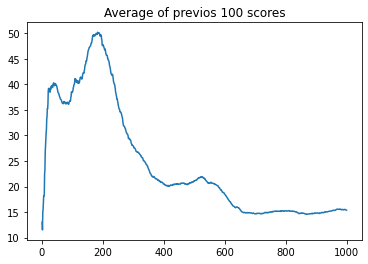

In [15]:
x = [i + 1 for i in range(n_games)]
plot_learning_curve( score_history,x, 'PPO.png')